In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 47s 106ms/step - loss: 0.3678 - accuracy: 0.8888 - val_loss: 0.0843 - val_accuracy: 0.9765
Epoch 2/15
422/422 [==============================] - 45s 107ms/step - loss: 0.1112 - accuracy: 0.9659 - val_loss: 0.0548 - val_accuracy: 0.9835
Epoch 3/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0865 - accuracy: 0.9731 - val_loss: 0.0538 - val_accuracy: 0.9862
Epoch 4/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0732 - accuracy: 0.9778 - val_loss: 0.0402 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.0397 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0569 - accuracy: 0.9817 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 42s 101ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0387 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0260053351521492
Test accuracy: 0.9908000230789185


In [ ]:
test = pd.read_csv("test.csv")

FileNotFoundError: ignored

In [ ]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = test/255
predictions = model.predict(np.array(X_test).reshape(-1, 28, 28))
predicted_classes = np.argmin(predictions, axis=1)
predicted_classes

875/875 [==============================] - 5s 6ms/step


array([6, 1, 6, ..., 4, 6, 6])

In [ ]:
submission = pd.read_csv("sample_submission.csv")

for i in range(28000):
  submission.loc[i, "Label"] = predicted_classes[i]

submission.to_csv("sample_submission.csv", index=False)

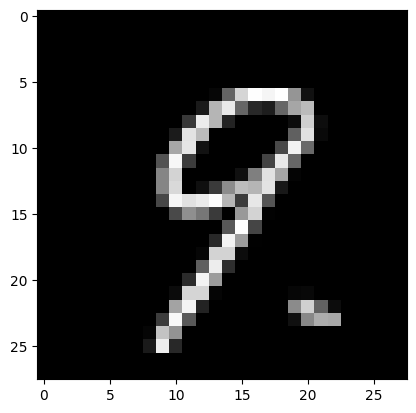

In [ ]:
current_image = np.array(np.array(X_test)[2])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()



In [ ]:
import tensorflow as tf
from tensorflow import keras

# Convert and save it as a TensorFlow SavedModel
export_path = 'saved_model'
tf.saved_model.save(model, export_path)
saved_model = tf.saved_model.load("saved_model")

# Convert the SavedModel to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

from google.colab import files
files.download('converted_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>